In [37]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("patient_data.csv")

# Step 1: Rename column 'C' to 'Gender'
df.rename(columns={'C': 'Gender'}, inplace=True)

# Step 2: Convert blood pressure ranges to average numbers
def convert_range_to_mean(value):
    try:
        if '-' in value:
            low, high = value.split('-')
            return (int(low.strip()) + int(high.strip())) / 2
        return float(value.strip())
    except:
        return np.nan

df['Systolic'] = df['Systolic'].apply(convert_range_to_mean)
df['Diastolic'] = df['Diastolic'].apply(convert_range_to_mean)

df['Stages'] = df['Stages'].str.upper().str.strip()
stage_map = {
    'NORMAL': 'NORMAL',
    'HYPERTENSION (STAGE-1)': 'HYPERTENSION STAGE 1',
    'HYPERTENSION STAGE-1': 'HYPERTENSION STAGE 1',
    'HYPERTENSION(STAGE-1)': 'HYPERTENSION STAGE 1',
    'HYPERTENSION (STAGE-2)': 'HYPERTENSION STAGE 2',
    'HYPERTENSION STAGE-2': 'HYPERTENSION STAGE 2',
    'HYPERTENSION(STAGE-2)': 'HYPERTENSION STAGE 2',
    'PREHYPERTENSION': 'PREHYPERTENSION',
    'PRE-HYPERTENSION': 'PREHYPERTENSION',
    'HYPERTENSION': 'HYPERTENSION',
}

# Step 3: One-hot encode categorical columns
categorical_cols = [
    'Gender', 'Age', 'History', 'Patient', 'TakeMedication',
    'Severity', 'BreathShortness', 'VisualChanges', 'NoseBleeding',
    'Whendiagnoused', 'ControlledDiet', 'Stages'
]

le_stage = LabelEncoder()
df['Stages_Label'] = le_stage.fit_transform(df['Stages'])

# Step 3: Encode other categorical features using LabelEncoder
label_enc = LabelEncoder()
cat_cols = ['Gender', 'Age', 'History', 'Patient', 'TakeMedication',
            'Severity', 'BreathShortness', 'VisualChanges',
            'NoseBleeding', 'Whendiagnoused', 'ControlledDiet']

for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col].astype(str))

# Show cleaned and encoded data
df.head()

# Final shape
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)


Original shape: (1825, 15)
Cleaned shape: (1440, 36)


In [45]:
# df


In [49]:
# Fill missing numeric values with median
df['Systolic'] = df['Systolic'].fillna(df['Systolic'].median())
df['Diastolic'] = df['Diastolic'].fillna(df['Diastolic'].median())

# Fill missing categorical values with mode
for col in ['Gender', 'Age', 'History', 'Stages', 'TakeMedication', 'Severity']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [51]:
# Check missing values
print(df.isnull().sum())

Gender             0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
Stages_Label       0
dtype: int64


In [53]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df['Stages_Label'] = label_enc.fit_transform(df['Stages'])  # For target

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect and flag outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a new column to mark outliers
    df[f'{column}_outlier'] = ~df[column].between(lower_bound, upper_bound)
    
    print(f"{column} outlier threshold:")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of outliers: {df[f'{column}_outlier'].sum()}")
    
    return df, lower_bound, upper_bound

# Apply to Systolic and Diastolic
df, sys_low, sys_up = detect_outliers_iqr(df, 'Systolic')
df, dia_low, dia_up = detect_outliers_iqr(df, 'Diastolic')

# Show sample flagged rows
print(df[['Systolic', 'Systolic_outlier', 'Diastolic', 'Diastolic_outlier']].head())


Systolic outlier threshold:
Lower Bound: 100.5, Upper Bound: 140.5
Number of outliers: 0
Diastolic outlier threshold:
Lower Bound: 70.5, Upper Bound: 110.5
Number of outliers: 0
   Systolic  Systolic_outlier  Diastolic  Diastolic_outlier
0     115.5             False       85.5              False
1     115.5             False       85.5              False
2     115.5             False       85.5              False
3     115.5             False       85.5              False
4     115.5             False       85.5              False


In [59]:
# # Visualize Systolic and Diastolic outliers
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# sns.boxplot(x=df['Systolic'])
# plt.axvline(sys_low, color='red', linestyle='--', label='Lower Threshold')
# plt.axvline(sys_up, color='green', linestyle='--', label='Upper Threshold')
# plt.title("Systolic Outliers")
# plt.legend()

# plt.subplot(1, 2, 2)
# sns.boxplot(x=df['Diastolic'])
# plt.axvline(dia_low, color='red', linestyle='--', label='Lower Threshold')
# plt.axvline(dia_up, color='green', linestyle='--', label='Upper Threshold')
# plt.title("Diastolic Outliers")
# plt.legend()

# plt.tight_layout()
# plt.show()


In [69]:
df.describe()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages_Label
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,0.499726,1.441096,0.907945,0.460822,0.921096,1.013151,0.465205,0.484932,1.026849,1.026301,118.661644,86.525753,0.460822,1.777534
std,0.500137,1.098723,0.289183,0.498599,0.854759,0.786287,0.498925,0.499910,0.678493,0.810680,4.651054,6.990116,0.498599,1.970962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.500000,75.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,115.500000,85.500000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,115.500000,85.500000,0.000000,1.000000
75%,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,125.500000,95.500000,1.000000,4.000000
max,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,125.500000,95.500000,1.000000,5.000000


In [71]:
len(df)

1825

In [73]:
 # print(df.dtypes)

<Axes: title={'center': 'Class Distribution'}, xlabel='Stages_Label'>

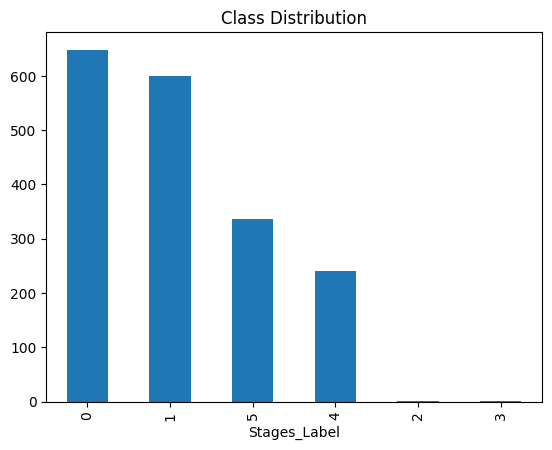

In [75]:
df['Stages_Label'].value_counts().plot(kind='bar', title='Class Distribution')

In [79]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df['Stages_Label'] = label_enc.fit_transform(df['Stages'])

In [81]:
df = df.drop(columns=['Stages'])  # if model shouldn't see it

In [83]:
df

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages_Label,Systolic_outlier,Diastolic_outlier
0,1,0,1,0,0,0,0,0,1,1,115.5,85.5,0,0,False,False
1,0,0,1,0,0,0,0,0,1,1,115.5,85.5,0,0,False,False
2,1,1,1,0,0,0,0,0,1,1,115.5,85.5,0,0,False,False
3,0,1,1,0,0,0,0,0,1,1,115.5,85.5,0,0,False,False
4,1,2,1,0,0,0,0,0,1,1,115.5,85.5,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0,1,1,0,0,2,0,0,1,2,115.5,75.0,0,5,False,False
1821,1,2,1,0,0,2,0,0,1,2,115.5,75.0,0,5,False,False
1822,0,2,1,0,0,2,0,0,1,2,115.5,75.0,0,5,False,False
1823,1,3,1,0,0,2,0,0,1,2,115.5,75.0,0,5,False,False


<Axes: >

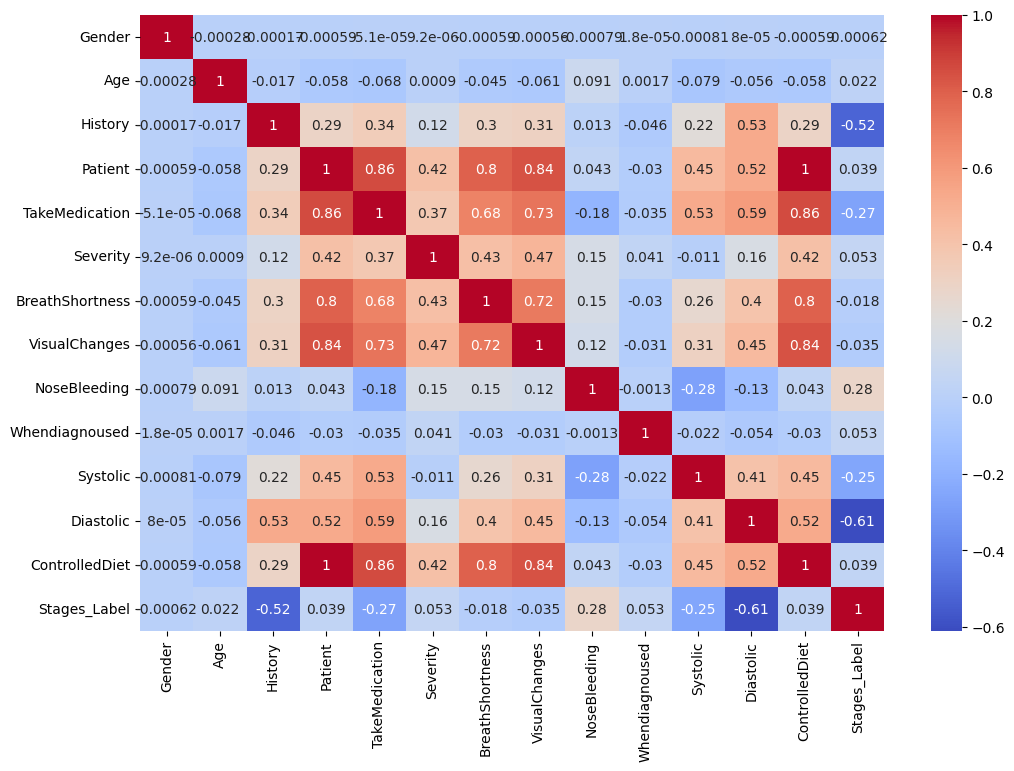

In [97]:
import seaborn as sns
plt.figure(figsize=(12, 8))
df.drop(['Systolic_outlier', 'Diastolic_outlier'], axis=1, inplace=True)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [101]:
# len(df)

In [103]:
from sklearn.model_selection import train_test_split

X = df.drop(['Stages_Label'], axis=1)
y = df['Stages_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       120
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        60

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [119]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

C:\Users\Shrad\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [1.         1.         0.99726027 0.99726027 1.        ]
Average score: 0.9989041095890411


In [127]:
df = df[~df['Stages_Label'].isin([2, 3])]

In [129]:
df['Stages_Label'].value_counts()

Stages_Label
0    648
1    599
5    336
4    240
Name: count, dtype: int64

In [133]:
# Hold out 10-15% for final test
from sklearn.model_selection import train_test_split

X_rest, X_final, y_rest, y_final = train_test_split(X, y, test_size=0.1, random_state=42)
model.fit(X_rest, y_rest)
final_preds = model.predict(X_final)

from sklearn.metrics import classification_report
print(classification_report(y_final, final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183



In [131]:
len(df)

1823

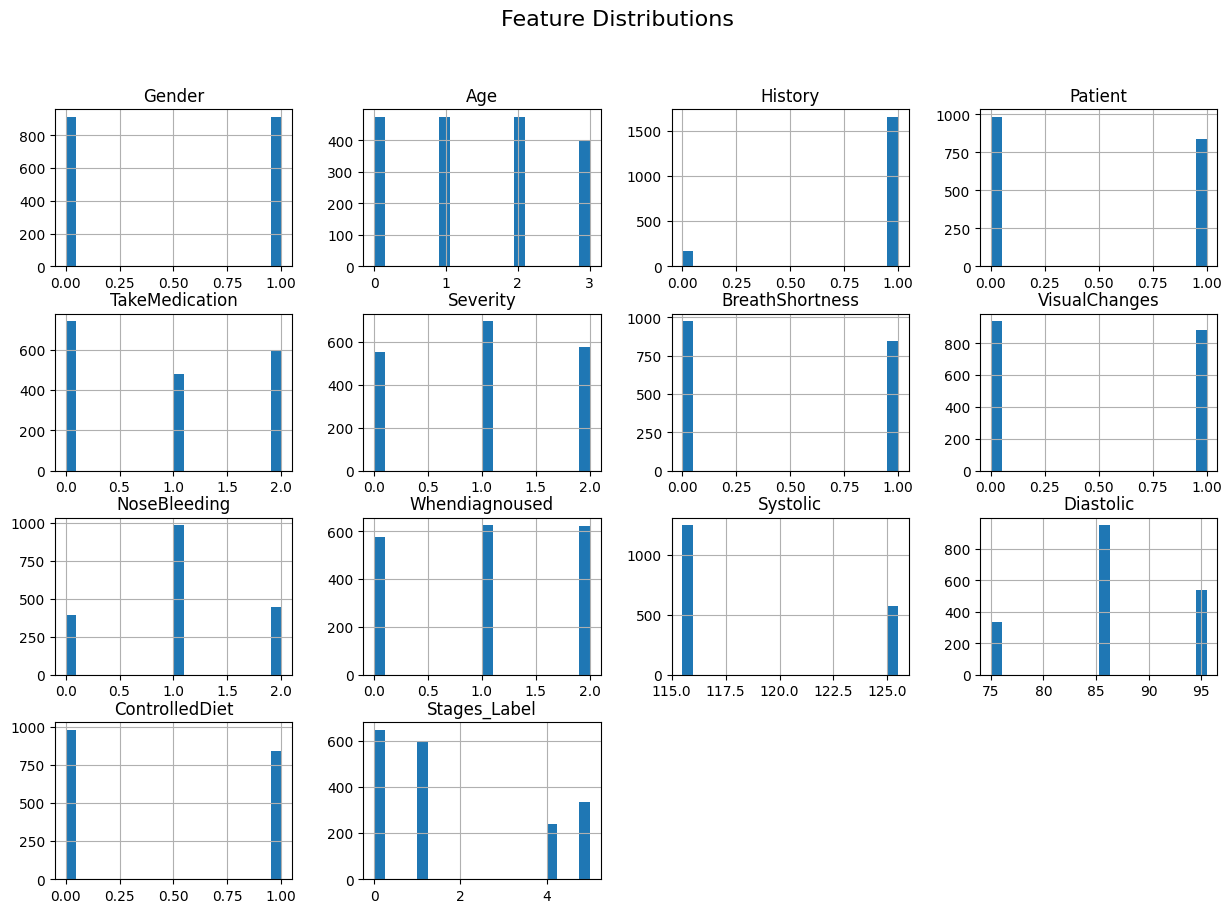

In [109]:
# Histograms (for distribution)
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

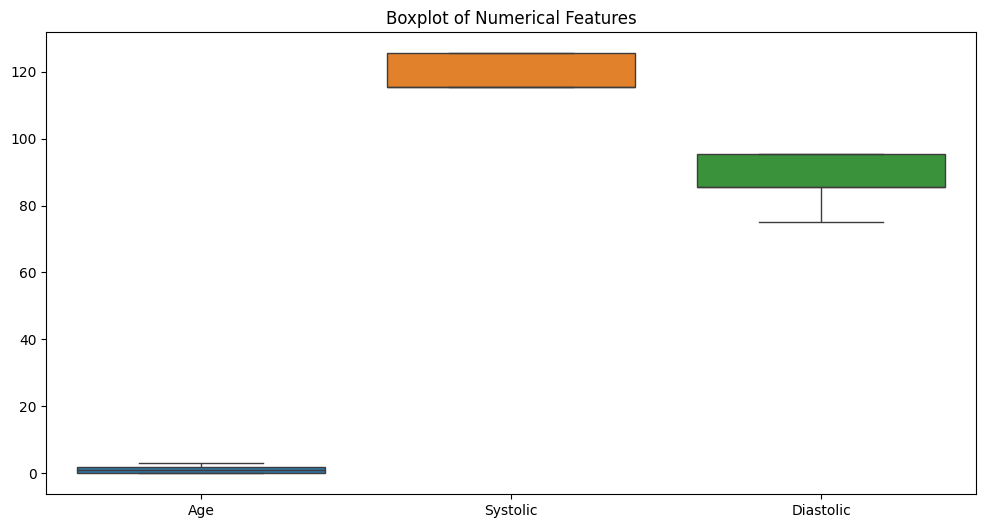

In [111]:
# Boxplots (for outlier detection)
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Systolic', 'Diastolic']])
plt.title("Boxplot of Numerical Features")
plt.show()

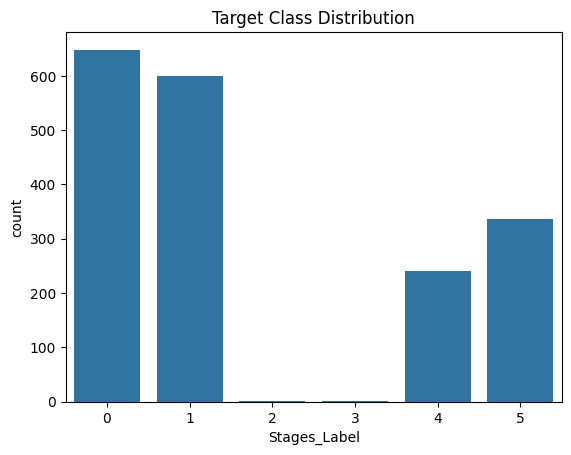

In [113]:
# Countplot (target class distribution)
sns.countplot(x='Stages_Label', data=df)
plt.title("Target Class Distribution")
plt.show()

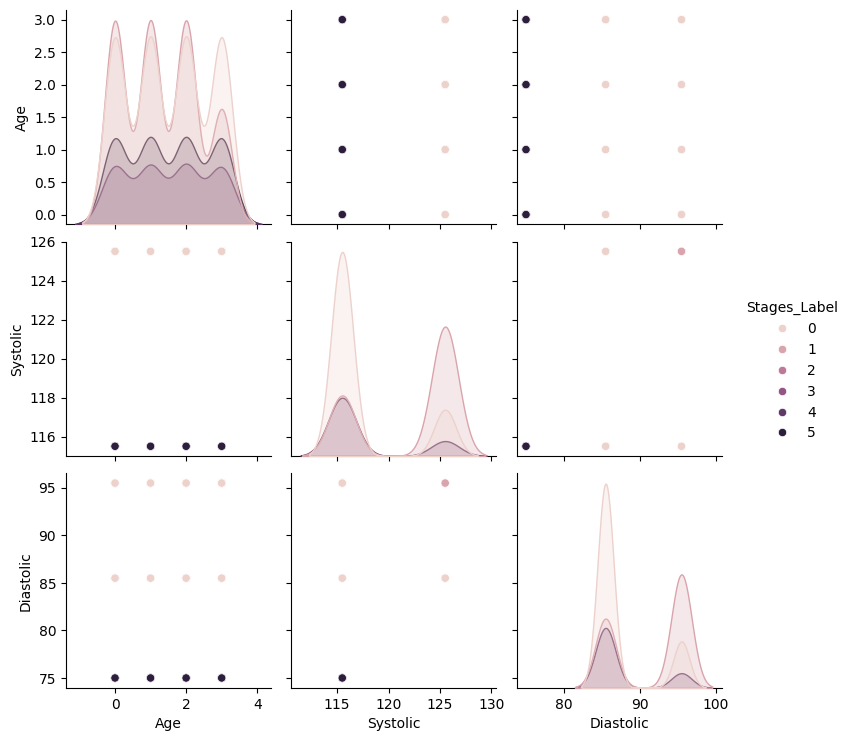

In [115]:
 # Pairplot (relationships between features)
sns.pairplot(df[['Age', 'Systolic', 'Diastolic', 'Stages_Label']], hue='Stages_Label')
plt.show()